<a href="https://colab.research.google.com/github/Manvi190502/Prodigy_ML_03/blob/main/Prodigy_ML_task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To classify the images of cats and dogs

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/4.0.0.incompleteDJDYNK/cats_vs_dogs-train.tfrecord*...:   0%|…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.


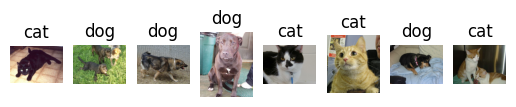

In [12]:
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

classNames = ['cat', 'dog']
split = ['train[:70%]', 'train[70%:]']

trainDataset, testDataset = tfds.load(name='cats_vs_dogs', split=split, as_supervised=True)

i = 0
fig, ax = plt.subplots(1, 8)
for image, label in testDataset.take(8):
    ax[i].axis('off')
    ax[i].set_title(classNames[label])
    ax[i].imshow(image)
    i += 1

plt.show()

Epoch 1/10
509/509 [==============================] - 582s 1s/step - loss: 0.6482 - accuracy: 0.6402 - val_loss: 0.5869 - val_accuracy: 0.6990
Epoch 2/10
509/509 [==============================] - 576s 1s/step - loss: 0.5308 - accuracy: 0.7357 - val_loss: 0.5270 - val_accuracy: 0.7356
Epoch 3/10
509/509 [==============================] - 564s 1s/step - loss: 0.4154 - accuracy: 0.8112 - val_loss: 0.5555 - val_accuracy: 0.7252
Epoch 4/10
509/509 [==============================] - 560s 1s/step - loss: 0.2776 - accuracy: 0.8810 - val_loss: 0.6405 - val_accuracy: 0.7341
Epoch 5/10
509/509 [==============================] - 566s 1s/step - loss: 0.1955 - accuracy: 0.9198 - val_loss: 0.8763 - val_accuracy: 0.7396
Epoch 6/10
509/509 [==============================] - 563s 1s/step - loss: 0.1328 - accuracy: 0.9496 - val_loss: 0.9072 - val_accuracy: 0.7511
Epoch 7/10
509/509 [==============================] - 587s 1s/step - loss: 0.0688 - accuracy: 0.9763 - val_loss: 1.3864 - val_accuracy: 0.7107

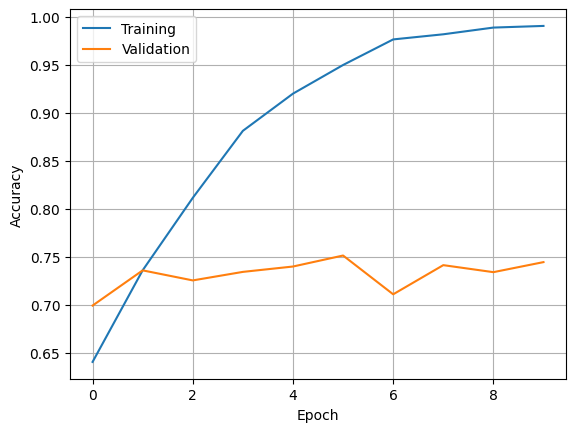

219/219 [==============================] - 61s 277ms/step - loss: 1.4658 - accuracy: 0.7442
1.4657877683639526
0.744232714176178


In [13]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
from matplotlib import pyplot as plt


def preprocess(img, label):
    return tf.image.resize(img, [HEIGHT, WIDTH]) / 255, label


HEIGHT = 200
WIDTH = 200
split = ['train[:70%]', 'train[70%:]']

trainDataset, testDataset = tfds.load(name='cats_vs_dogs', split=split, as_supervised=True)

trainDataset = trainDataset.map(preprocess).batch(32)
testDataset = testDataset.map(preprocess).batch(32)

model = keras.Sequential([
    keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(HEIGHT, WIDTH, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

trainHistory = model.fit(trainDataset, epochs=10, validation_data=testDataset)

plt.plot(trainHistory.history['accuracy'])
plt.plot(trainHistory.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'])
plt.grid()
plt.show()

(loss, accuracy) = model.evaluate(testDataset)
print(loss)
print(accuracy)

model.save('model.h5')

8/8 [==============================] - 1s 25ms/step


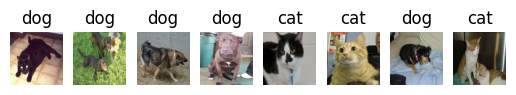

In [14]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
from matplotlib import pyplot as plt


def preprocess(img, label):
    return tf.image.resize(img, [HEIGHT, WIDTH]) / 255, tf.cast(label, tf.float32)


HEIGHT = 200
WIDTH = 200
classNames = ['cat', 'dog']
split = ['train[:70%]', 'train[70%:]']

trainDataset, testDataset = tfds.load(name='cats_vs_dogs', split=split, as_supervised=True)

testDataset = testDataset.map(preprocess).batch(1)

model = keras.models.load_model('model.h5')

predictions = model.predict(testDataset.take(8))

i = 0
fig, ax = plt.subplots(1, 8)
for image, _ in testDataset.take(8):
    predictedLabel = int(predictions[i] >= 0.5)

    ax[i].axis('off')
    ax[i].set_title(classNames[predictedLabel])
    ax[i].imshow(image[0])
    i += 1

plt.show()